In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns

In [15]:
data = pd.read_csv("puchkov.k@phystech.edu.csv", header=None)
data.sample(5)

,0,1
65,-0.267114,4.411551
79,-1.261160,-0.971383
53,-0.287718,3.403339
96,-0.003656,-1.878132
40,0.525716,5.825582


In [14]:
data.describe()

,0,1
count,100.000000,100.000000
mean,1000.031785,0.512996
std,9999.895829,6.168604
min,-2.809858,-12.749254
25%,-0.534725,-3.968053
50%,0.023921,0.616534
75%,0.861984,5.067294
max,99999.000000,13.674474


In [3]:
col1 = data.values[:, 0]
col2 = data.values[:, 1]

**Коэффициент корреляции Кендалла по исходной выборке (без удаления выбросов):**

In [4]:
st.kendalltau(col1, col2)[0].round(3)

0.143

**Существует ли линейная взаимосвязь между столбцами выборки по t-критерию Стьюдента?**

In [5]:
st.ttest_ind(col1, col2)

Ttest_indResult(statistic=0.9995290107562931, pvalue=0.31875844829274713)

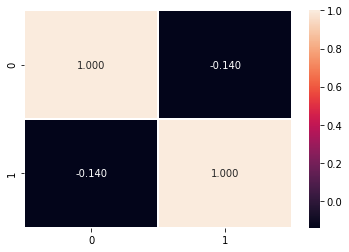

In [9]:
_ = sns.heatmap(data.corr(),annot= True,linewidths=0.5,fmt = ".3f")

**Существует ли линейная взаимосвязь между столбцами выборки по t-критерию Стьюдента, если исключить выбросы из выборки?**

In [20]:
better_data = data[(np.abs(st.zscore(data)) < 3).all(axis=1)]
better_data.describe()

,0,1
count,99.000000,99.000000
mean,0.042207,0.599332
std,1.002949,6.138971
min,-2.809858,-12.749254
25%,-0.544024,-3.879983
50%,0.018447,0.697998
75%,0.814311,5.123591
max,2.558112,13.674474


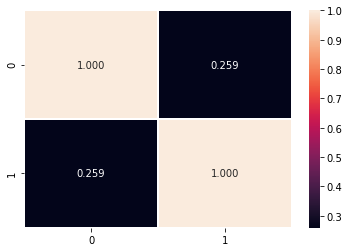

In [8]:
_ = sns.heatmap(better_data.corr(),annot= True,linewidths=0.5,fmt = ".3f")

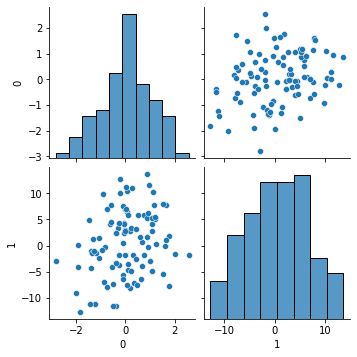

In [10]:
_ = sns.pairplot(better_data)

По графику видно, что линейной взаимосвязи тут точно нет